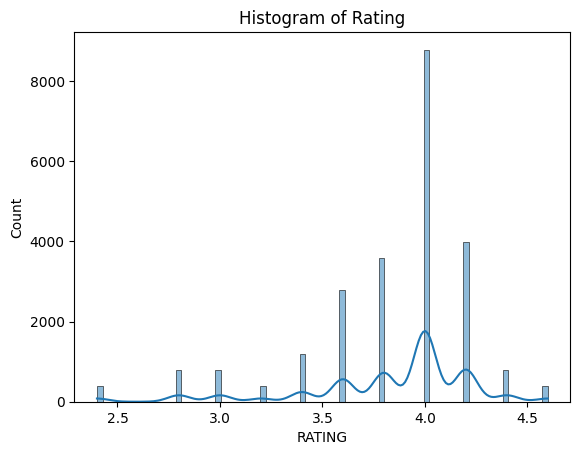

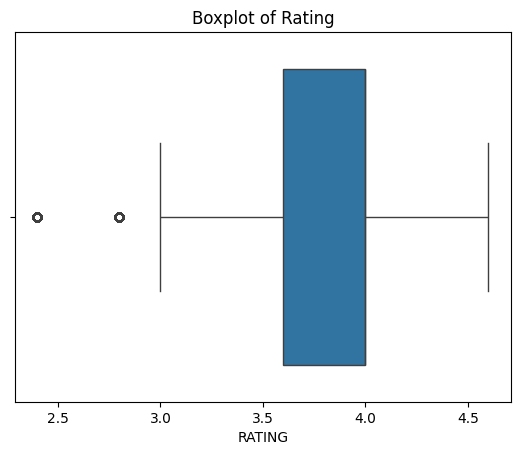

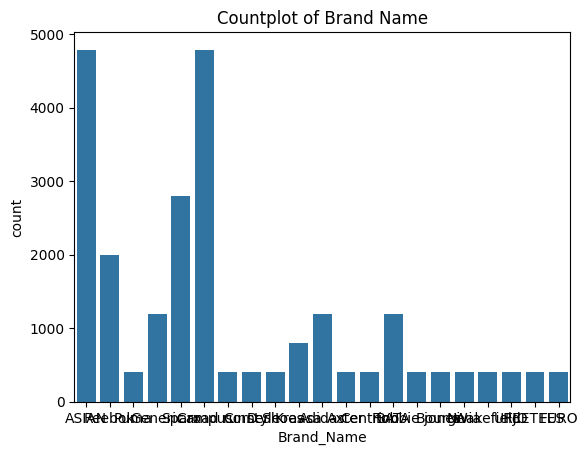

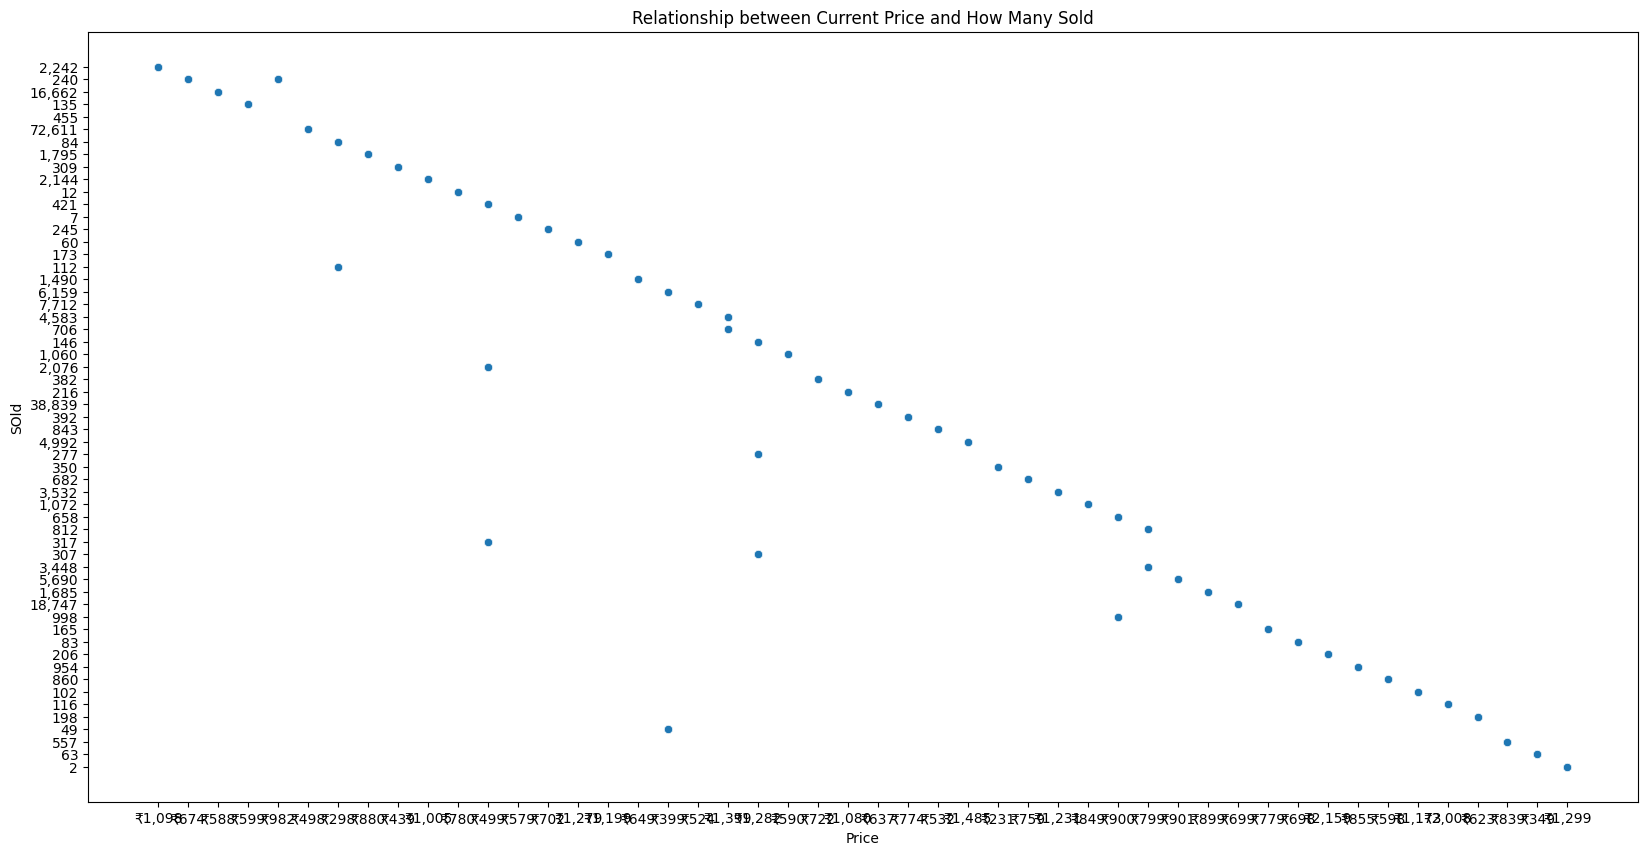

In [1]:
##VISUALISASI DATA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Menampilkan histogram untuk distribusi data numerik
sns.histplot(data['RATING'], kde=True)
plt.title('Histogram of Rating')
plt.show()

# Menampilkan boxplot untuk melihat distribusi dan outlier
sns.boxplot(x=data['RATING'])
plt.title('Boxplot of Rating')
plt.show()

# Menampilkan countplot untuk data kategorikal
sns.countplot(x='Brand_Name', data=data)
plt.title('Countplot of Brand Name')
plt.show()

plt.figure(figsize=(20,10))
sns.scatterplot(x='Current_Price', y='How_Many_Sold', data=data)
plt.title('Relationship between Current Price and How Many Sold')
plt.xlabel('Price')
plt.ylabel('SOld')
plt.show()

In [3]:
##DENGAN KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Cetak nama kolom untuk verifikasi
print("Nama kolom dalam dataset:", data.columns)

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline dengan preprocessor dan model KNeighborsRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Melatih model
model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")




Nama kolom dalam dataset: Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')
Train R2 Score: 0.6063314097279471
Test R2 Score: 0.10322820037105729
Train RMSE: 0.26301039539361637
Test RMSE: 0.3664241622309679


In [9]:
##hyperparametrik KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Cetak nama kolom untuk verifikasi
print("Nama kolom dalam dataset:", data.columns)

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline dengan preprocessor dan model KNeighborsRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Menentukan parameter grid untuk KNeighborsRegressor
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Mencetak hyperparameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")


Nama kolom dalam dataset: Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')
Best parameters found:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Train R2 Score: 0.6392662819455892
Test R2 Score: 0.11391465677179946
Train RMSE: 0.25176821491712026
Test RMSE: 0.3642343567906063


Train R2 Score: 0.9298647052761733
Test R2 Score: 0.48102337662337813
Train RMSE: 0.11101351269102455
Test RMSE: 0.2787513826572581


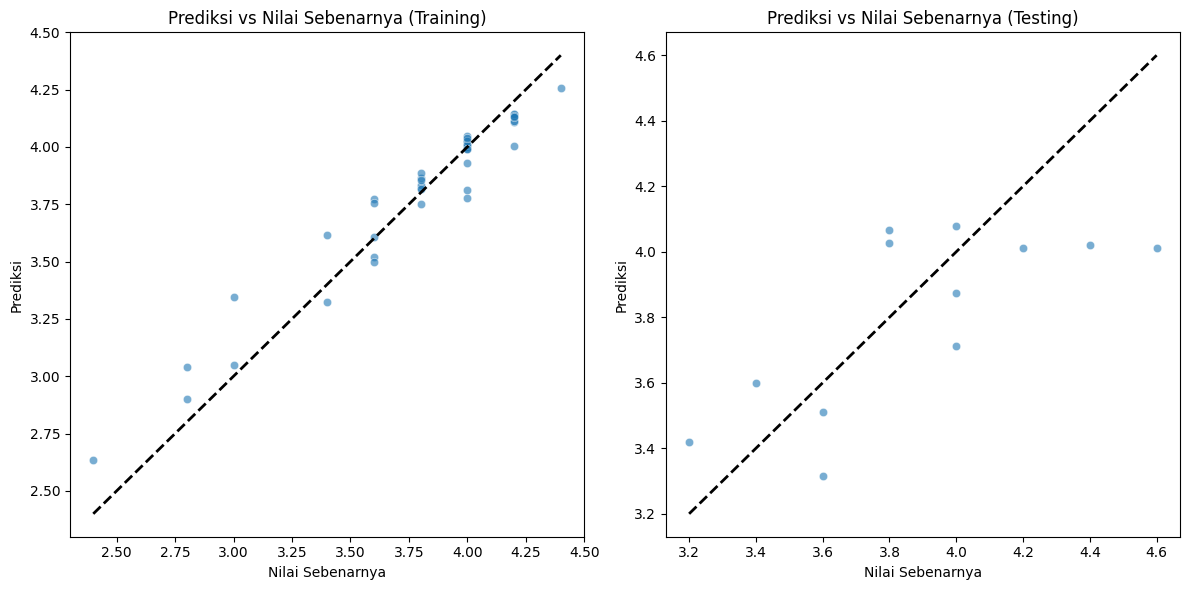

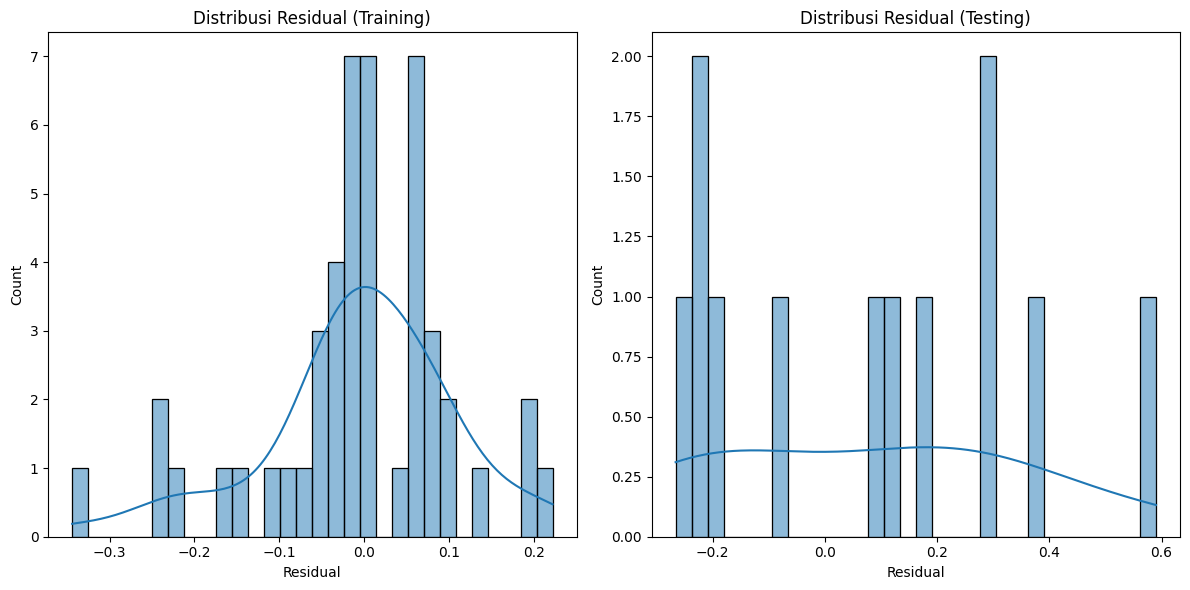

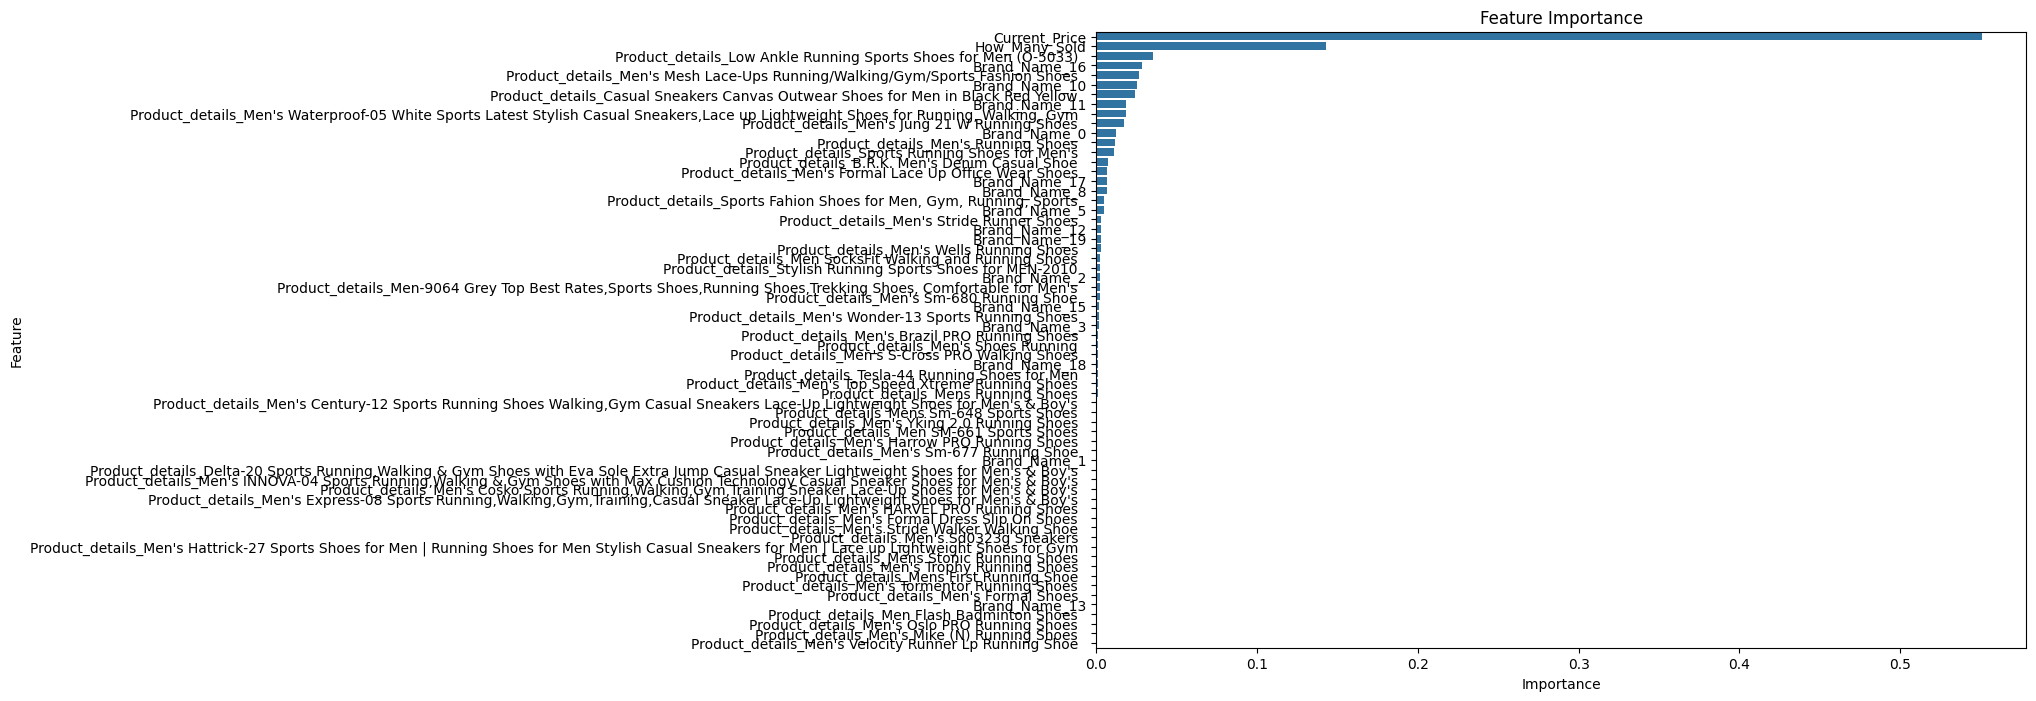

In [4]:
##dengan random forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data[['Brand_Name', 'Product_details', 'How_Many_Sold', 'Current_Price']]
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline dengan preprocessor dan model RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Melatih model
model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

# Plot Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(12, 6))

# Plot untuk data pelatihan
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya (Training)')

# Plot untuk data pengujian
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya (Testing)')

plt.tight_layout()
plt.show()

# Plot residual
# Menghitung residual
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

plt.figure(figsize=(12, 6))

# Plot residual untuk data pelatihan
plt.subplot(1, 2, 1)
sns.histplot(residual_train, bins=30, kde=True)
plt.xlabel('Residual')
plt.title('Distribusi Residual (Training)')

# Plot residual untuk data pengujian
plt.subplot(1, 2, 2)
sns.histplot(residual_test, bins=30, kde=True)
plt.xlabel('Residual')
plt.title('Distribusi Residual (Testing)')

plt.tight_layout()
plt.show()

# Mengambil pentingnya fitur dari model RandomForestRegressor
importances = model.named_steps['rf'].feature_importances_

# Nama fitur yang sesuai dengan kolom asli
def get_feature_names(preprocessor):
    # Nama fitur numerik
    numeric_feature_names = numerical_features

    # Nama fitur kategorikal (OneHotEncoder)
    onehotencoder = preprocessor.transformers_[1][1]
    categorical_feature_names = onehotencoder.get_feature_names_out()

    # Gabungkan nama fitur numerik dan kategorikal
    all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])
    return all_feature_names

feature_names = get_feature_names(model.named_steps['preprocessor'])

# Membuat DataFrame untuk visualisasi
feature_importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot pentingnya fitur
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_data)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Best parameters found:  {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Train R2 Score: 0.8035236755624003
Test R2 Score: 0.35592992053605566
Train RMSE: 0.1858072450672073
Test RMSE: 0.31053438386784965


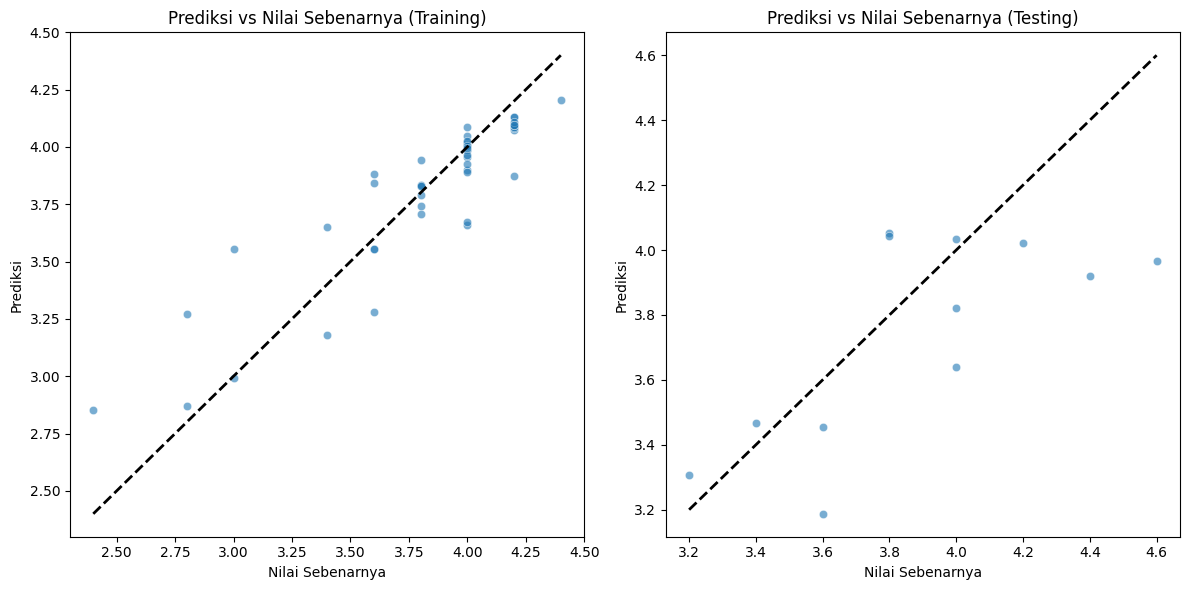

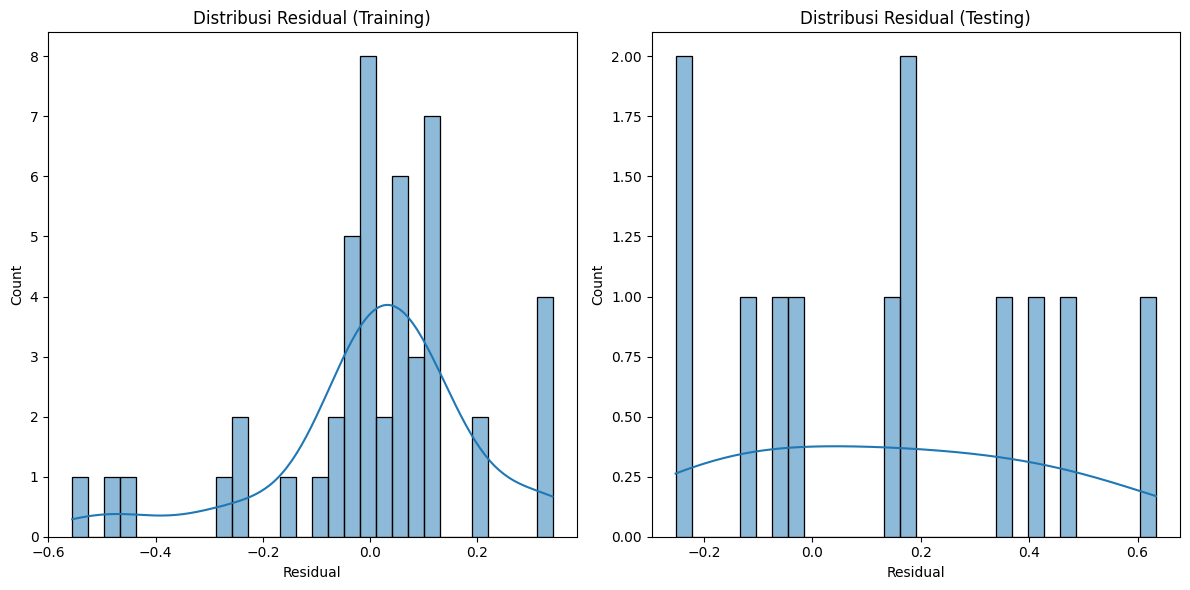

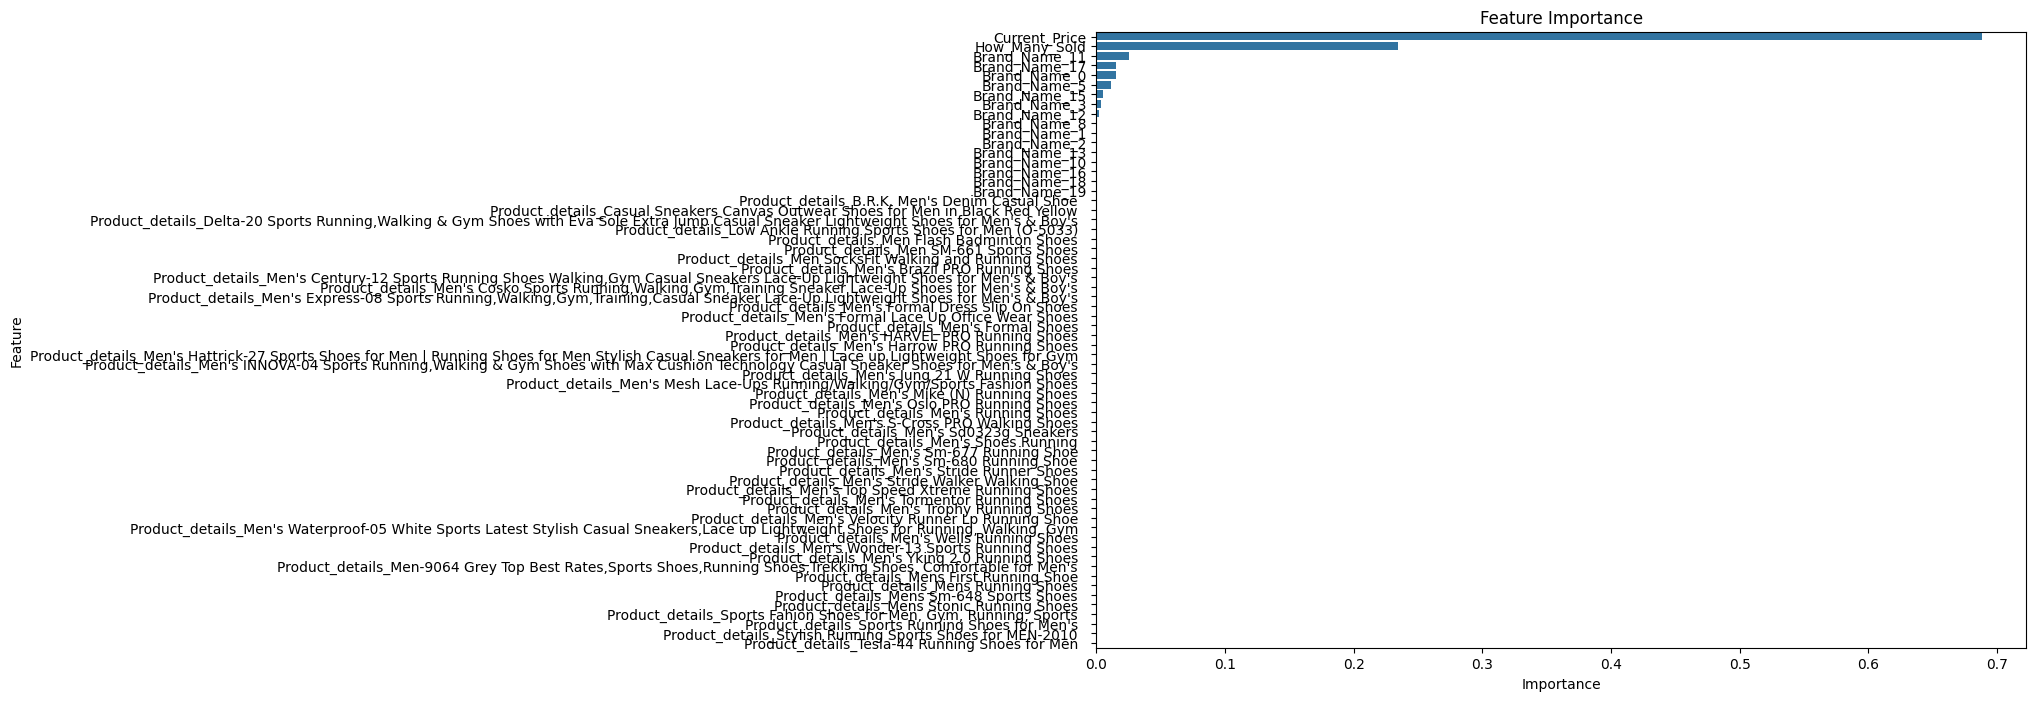

In [8]:
##hyperparametric random forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data[['Brand_Name', 'Product_details', 'How_Many_Sold', 'Current_Price']]
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline dengan preprocessor dan model RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Menentukan parameter grid untuk RandomForestRegressor
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Mencetak hyperparameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

# Plot Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(12, 6))

# Plot untuk data pelatihan
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya (Training)')

# Plot untuk data pengujian
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya (Testing)')

plt.tight_layout()
plt.show()

# Plot residual
# Menghitung residual
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

plt.figure(figsize=(12, 6))

# Plot residual untuk data pelatihan
plt.subplot(1, 2, 1)
sns.histplot(residual_train, bins=30, kde=True)
plt.xlabel('Residual')
plt.title('Distribusi Residual (Training)')

# Plot residual untuk data pengujian
plt.subplot(1, 2, 2)
sns.histplot(residual_test, bins=30, kde=True)
plt.xlabel('Residual')
plt.title('Distribusi Residual (Testing)')

plt.tight_layout()
plt.show()

# Mengambil pentingnya fitur dari model RandomForestRegressor
importances = best_model.named_steps['rf'].feature_importances_

# Nama fitur yang sesuai dengan kolom asli
def get_feature_names(preprocessor):
    # Nama fitur numerik
    numeric_feature_names = numerical_features

    # Nama fitur kategorikal (OneHotEncoder)
    onehotencoder = preprocessor.transformers_[1][1]
    categorical_feature_names = onehotencoder.get_feature_names_out(categorical_features)

    # Gabungkan nama fitur numerik dan kategorikal
    all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])
    return all_feature_names

feature_names = get_feature_names(best_model.named_steps['preprocessor'])

# Membuat DataFrame untuk visualisasi
feature_importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot pentingnya fitur
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_data)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [5]:
###DENGAN SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Mengkategorikan target jika perlu (misalnya, jika target adalah nilai kontinu)
# Convert 'RATING' to categorical if it isn't already
if not pd.api.types.is_numeric_dtype(data['RATING']):
    data['RATING'] = pd.Categorical(data['RATING']).codes

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR

# Membuat pipeline dengan preprocessor dan model SVR
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='linear'))  # Bisa mencoba kernel lain seperti 'rbf'
])

# Melatih model
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Memprediksi dan mengevaluasi model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")


Train R2 Score: 0.9553717148006599
Test R2 Score: 0.4250033879857191
Train RMSE: 0.08855490705285522
Test RMSE: 0.29341058351911414


In [7]:
##hyperparametrik untuk SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Mengkategorikan target jika perlu (misalnya, jika target adalah nilai kontinu)
# Convert 'RATING' to categorical if it isn't already
if not pd.api.types.is_numeric_dtype(data['RATING']):
    data['RATING'] = pd.Categorical(data['RATING']).codes

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Membuat pipeline dengan preprocessor dan model SVR
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

# Menentukan parameter grid untuk SVR
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Mencetak hyperparameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")


Best parameters found:  {'svr__C': 1, 'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Train R2 Score: 0.93929227848267
Test R2 Score: 0.27745067932350276
Train RMSE: 0.10328315556617208
Test RMSE: 0.3289098508054178


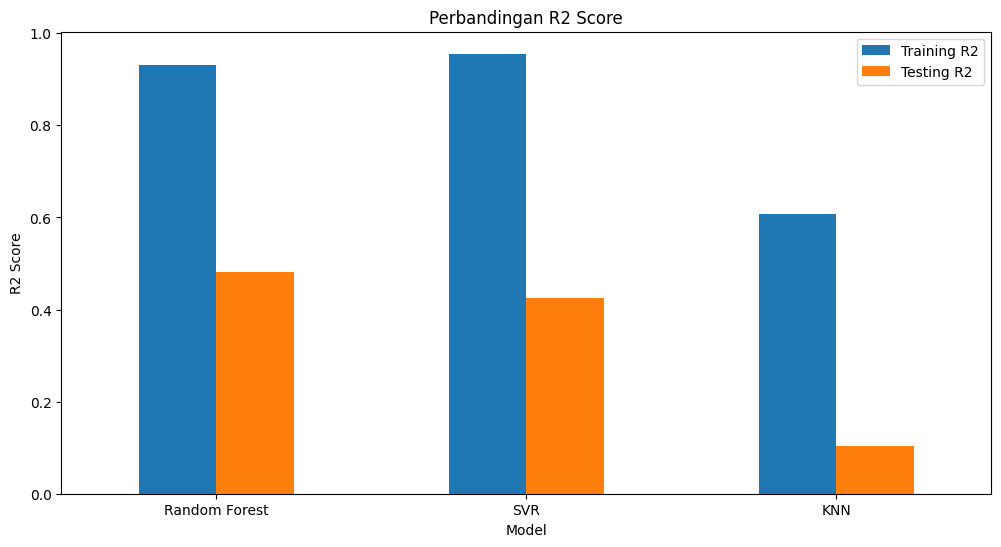

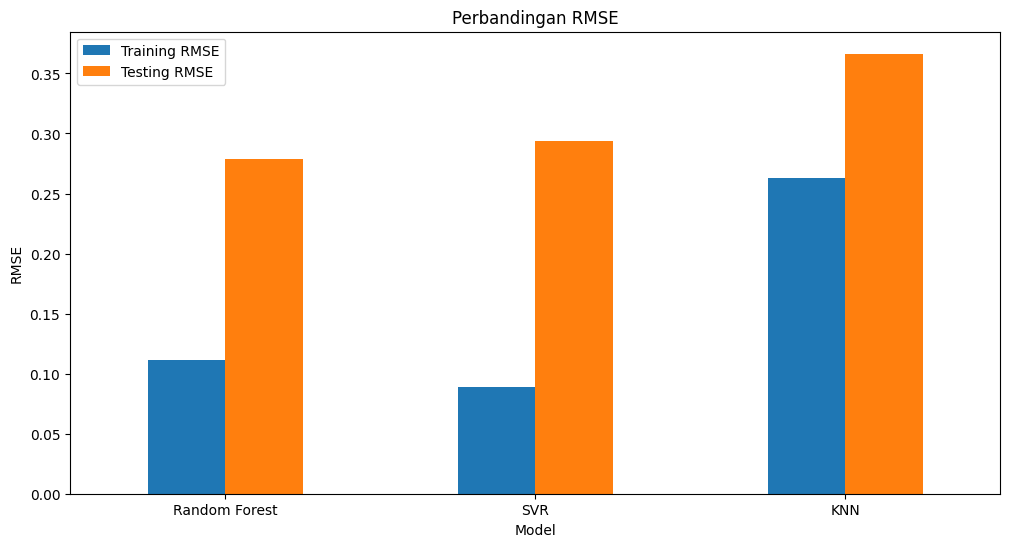

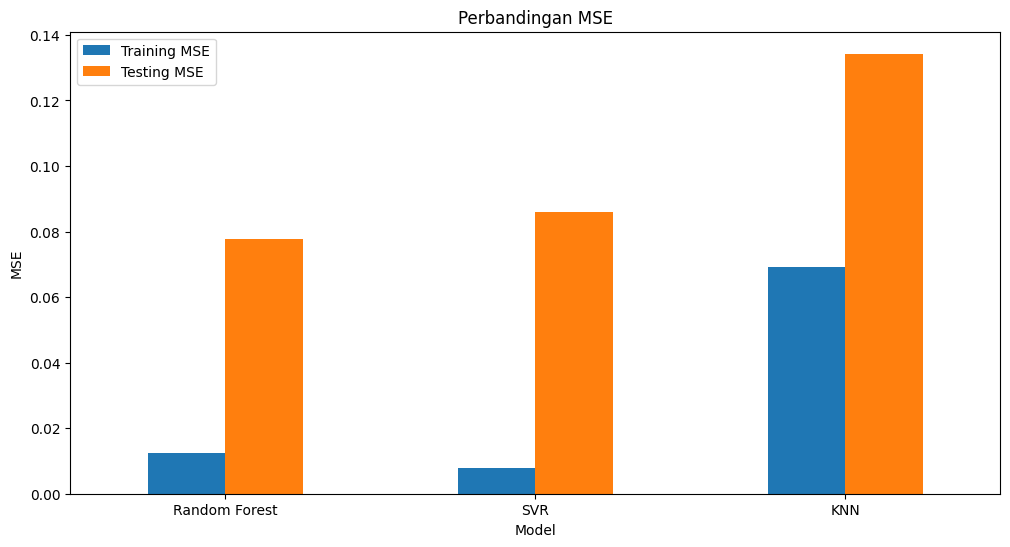

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definisikan model-model yang akan dibandingkan
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    results[model_name] = {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plot perbandingan R2 Score
plt.figure(figsize=(12, 6))
results_df[['train_r2', 'test_r2']].plot(kind='bar', ax=plt.gca())
plt.title('Perbandingan R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(['Training R2', 'Testing R2'])
plt.show()

# Plot perbandingan RMSE
plt.figure(figsize=(12, 6))
results_df[['train_rmse', 'test_rmse']].plot(kind='bar', ax=plt.gca())
plt.title('Perbandingan RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(['Training RMSE', 'Testing RMSE'])
plt.show()

# Plot perbandingan MSE
plt.figure(figsize=(12, 6))
results_df[['train_mse', 'test_mse']].plot(kind='bar', ax=plt.gca())
plt.title('Perbandingan MSE')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(['Training MSE', 'Testing MSE'])
plt.show()


In [12]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membaca data dari file CSV
data = pd.read_csv('MEN_SHOES.csv')

# Nilai hilang
def fill_missing_values(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

data = fill_missing_values(data)

# Menghapus duplikat
data = data.drop_duplicates()

# Menentukan fitur kategorikal dan numerik
categorical_features = ['Brand_Name', 'Product_details']
numerical_features = ['How_Many_Sold', 'Current_Price']

# Membersihkan data numerik yang salah format
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Encode the categorical variables
le = LabelEncoder()
data['Brand_Name'] = le.fit_transform(data['Brand_Name'])

# Verifikasi apakah kolom 'RATING' ada dalam dataset
if 'RATING' not in data.columns:
    raise ValueError("Kolom 'RATING' tidak ditemukan dalam dataset")

# Split the data into features (X) and target (y)
X = data.drop('RATING', axis=1)
y = data['RATING']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mempersiapkan fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definisikan model-model yang akan dibandingkan
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    results[model_name] = {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Menentukan model terbaik berdasarkan RMSE terkecil pada data uji
best_model_name = results_df['test_rmse'].idxmin()
best_model_rmse = results_df.loc[best_model_name, 'test_rmse']

# Streamlit untuk menampilkan hasil
st.title('Perbandingan Model: Random Forest, SVR, dan KNN')

st.write("### Hasil Evaluasi Model")
st.dataframe(results_df)

st.write("### Model Terbaik Berdasarkan RMSE pada Data Uji")
st.write(f"Model Terbaik: **{best_model_name}**")
st.write(f"RMSE: **{best_model_rmse:.4f}**")

# Plot perbandingan R2 Score
st.write("### Perbandingan R2 Score")
st.bar_chart(results_df[['train_r2', 'test_r2']])

# Plot perbandingan RMSE
st.write("### Perbandingan RMSE")
st.bar_chart(results_df[['train_rmse', 'test_rmse']])

# Plot perbandingan MSE
st.write("### Perbandingan MSE")
st.bar_chart(results_df[['train_mse', 'test_mse']])


2024-07-26 03:24:28.135 
  command:

    streamlit run C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()